In [9]:
# try the best model performence on different training set sizes

In [10]:
# It is a meal delivery company which operates in multiple cities. 
# They have various fulfillment centers (packing warehouse)
# in these cities for dispatching meal orders to their customers. 
# The client wants you to help these centers with demand forecasting for upcoming weeks
# so that these centers will plan the stock of raw materials accordingly.

In [17]:
import numpy as np
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import seaborn as sns
import pandas as pd
%matplotlib inline

# Load Data

In [12]:
##demand = demand.merge(fulfilment_center, on='center_id').merge(meal_info, on='meal_id')

In [11]:
# Food demand: predict num_orders
demand = pd.read_csv('demand.csv')
demand.drop('id',axis=1,inplace=True)
fulfilment_center = pd.read_csv('fulfilment_center_info.csv')
meal_info = pd.read_csv('meal_info.csv')
demand = demand.merge(fulfilment_center, on='center_id')
demand = demand.merge(meal_info, on='meal_id')
demand = demand.sort_values(['week','meal_id','center_id'])

# Data Explore

In [18]:
# show the data

In [19]:
demand.head(5)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
82183,1,10,1062,181.39,181.39,0,0,865,590,56,...,0,0,0,0,0,0,0,0,1,0
73341,1,11,1062,184.36,182.36,0,0,798,679,56,...,0,0,0,0,0,0,0,0,1,0
73776,1,13,1062,185.33,185.33,0,0,998,590,56,...,0,0,0,0,0,0,0,0,1,0
78414,1,14,1062,183.36,182.36,0,0,256,654,56,...,0,0,0,0,0,0,0,0,1,0
78559,1,17,1062,184.36,182.36,0,0,270,517,56,...,0,0,0,0,0,0,0,0,1,0


In [16]:
# Check how many examples and how many features are in the dataset

In [17]:
demand.shape

(456548, 14)

In [18]:
# We have 456,548 examples and 14 (after dropping 'id') columns (13 features and one label - num orders

In [19]:
# Check for missing values

In [20]:
demand.isna().mean()

week                     0.0
center_id                0.0
meal_id                  0.0
checkout_price           0.0
base_price               0.0
emailer_for_promotion    0.0
homepage_featured        0.0
num_orders               0.0
city_code                0.0
region_code              0.0
center_type              0.0
op_area                  0.0
category                 0.0
cuisine                  0.0
dtype: float64

In [21]:
# no missing values

## describing plots on the data

#### Label Distirbution

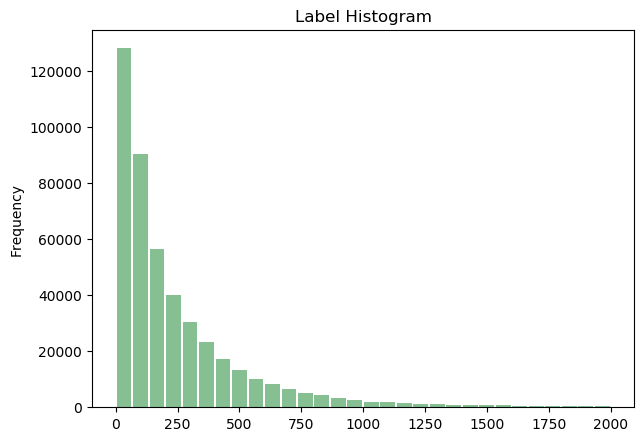

In [136]:
from matplotlib import pyplot as py

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = demand['num_orders']
plt.hist(x, 30, range=[0, 2000], facecolor='#86bf91', align='mid',zorder=2, rwidth=0.9)
#py.xticks(range(0,5000))
plt.gca().set(title='Label Histogram', ylabel='Frequency');

#### number of orders by checkout price

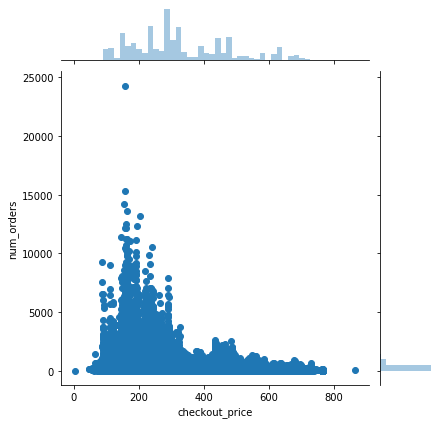

In [22]:
sns.jointplot(x='checkout_price',y='num_orders',data=demand)

#### number of orders by weeks 

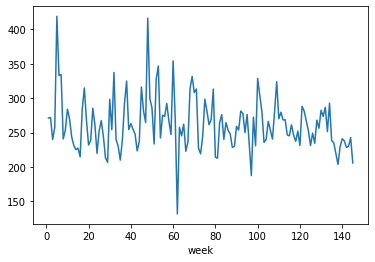

In [23]:
demand.groupby('week').num_orders.mean().plot()

#### number of orders by cuisine type

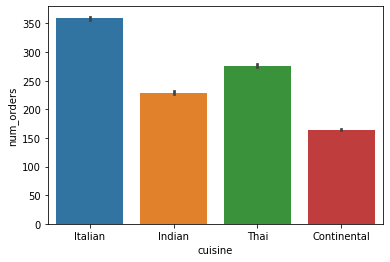

In [24]:
sns.barplot(demand['cuisine'],demand['num_orders'])

#### number of orders by meal category 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

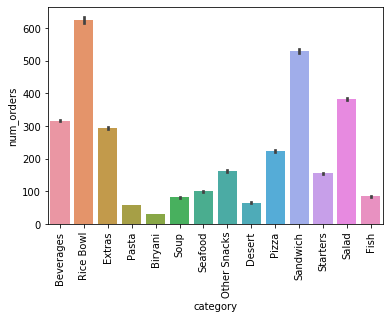

In [25]:
sns.barplot(demand['category'],demand['num_orders'])
plt.xticks(rotation = '90')

#### corr table

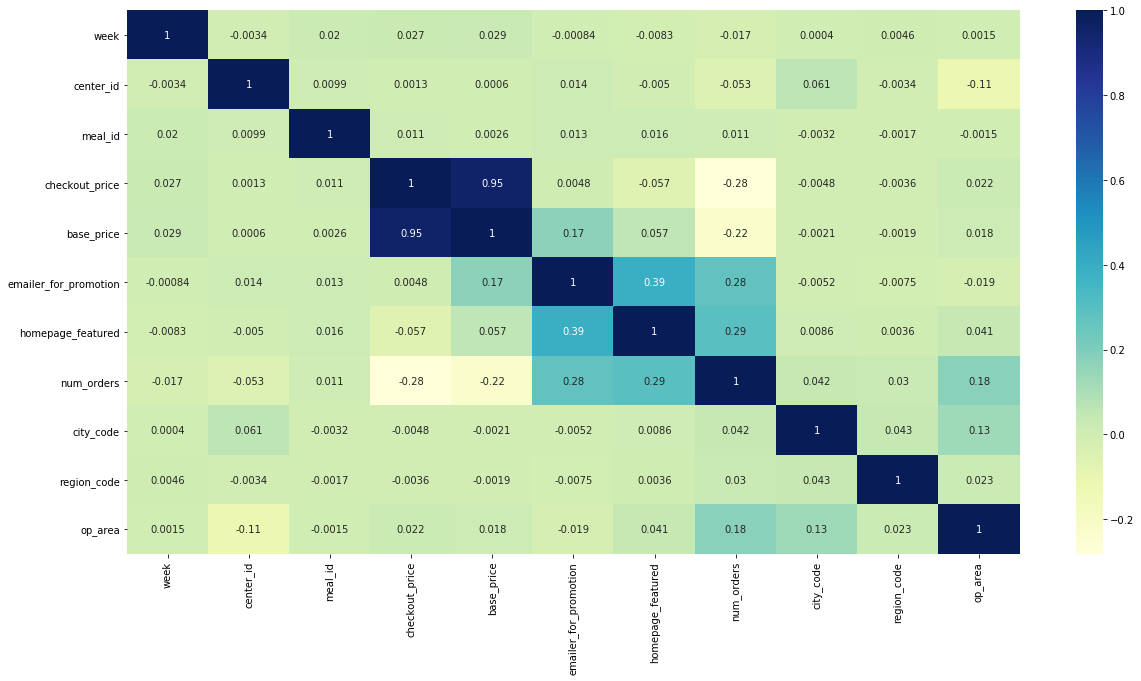

In [26]:
plt.figure(figsize=(20,10))
c=demand.corr()
sns.heatmap(c,cmap="YlGnBu",annot=True)

#### corr of numb_orders with other features

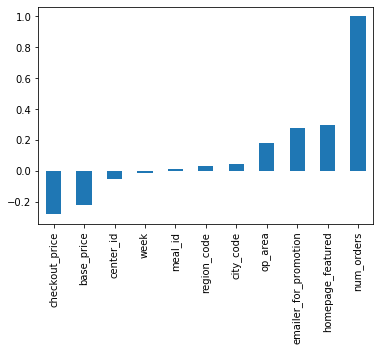

In [27]:
demand.corr()['num_orders'].sort_values().plot.bar()

#### All the features corr plots

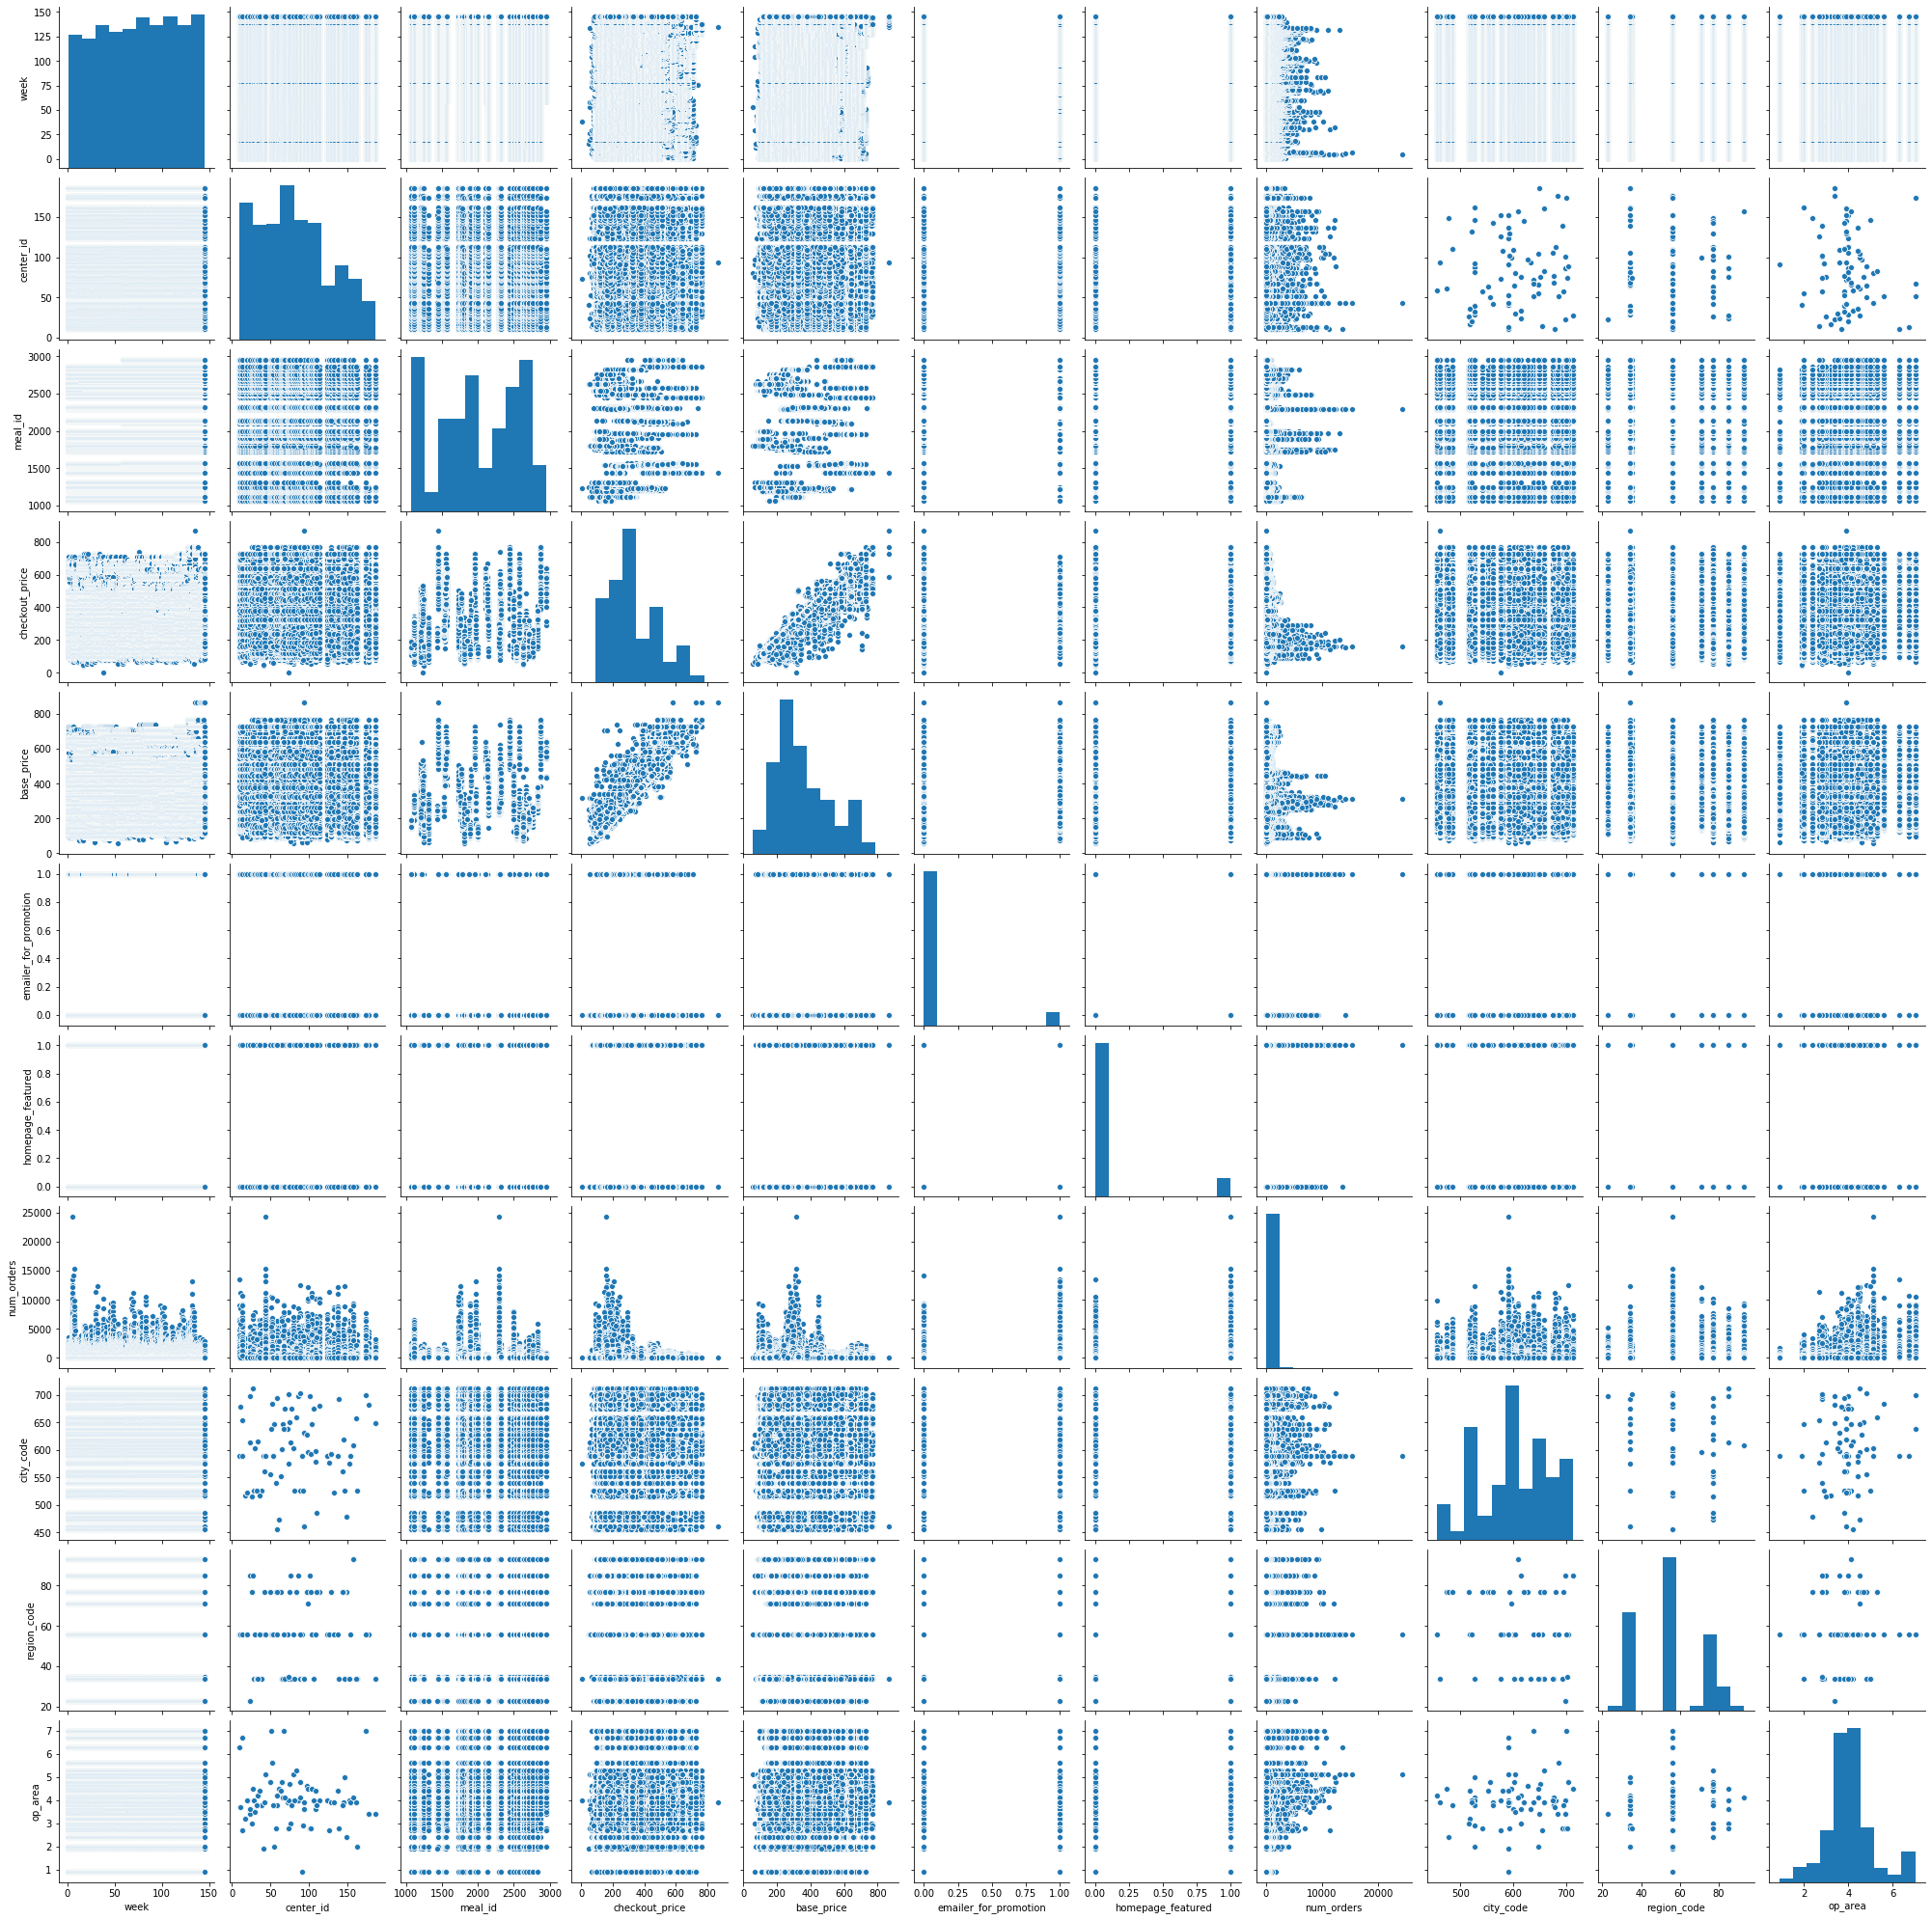

In [28]:
sns.pairplot(demand)

## Feature Engineering

In [29]:
# Show object columns

In [30]:
demand.dtypes

week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

In [31]:
# cusine, category, center_type are objects

In [32]:
# Show Unique values for object columns

In [33]:
demand['center_type'].value_counts()

TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: center_type, dtype: int64

In [34]:
demand['category'].value_counts()

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64

In [35]:
demand['cuisine'].value_counts()

Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: cuisine, dtype: int64

In [36]:
# get dummies for object type columns

In [20]:
demand = pd.get_dummies(demand)

In [38]:
# rename all the collumns to lower case

In [39]:
demand = demand.rename(columns=str.lower)

In [40]:
# Show the new data frame

In [21]:
demand.sample(10)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
310351,33,149,2704,292.03,292.03,0,0,26,478,77,...,0,0,0,0,0,0,0,0,0,1
95314,124,61,2707,181.45,225.04,1,1,555,473,77,...,0,0,0,0,0,0,0,0,1,0
353179,125,161,1216,340.53,416.13,0,0,28,658,34,...,0,0,0,0,0,0,0,0,1,0
347018,42,110,1543,400.64,465.63,0,0,81,485,77,...,0,0,0,0,0,0,0,1,0,0
207771,27,104,1754,279.36,279.36,0,0,945,647,56,...,0,0,1,0,0,0,0,0,1,0
263101,72,57,1962,641.23,640.23,0,0,42,541,77,...,0,0,0,0,0,0,1,0,0,0
68176,23,26,1778,159.11,159.11,0,0,135,515,77,...,0,0,0,0,0,0,0,0,1,0
387589,18,89,2664,320.13,320.13,0,0,323,703,56,...,0,1,0,0,0,0,0,0,1,0
154873,100,27,1109,240.56,299.76,0,0,472,713,85,...,1,0,0,0,0,0,0,1,0,0
56511,120,64,1248,144.59,143.59,0,0,41,553,77,...,0,0,0,0,0,0,0,1,0,0


In [42]:
demand.shape

(456548, 32)

In [43]:
# 32 columns (31 features & 1 label)

## Keep Exploring

In [44]:
# show the corr between the features

In [45]:
demand.corr()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,...,category_rice bowl,category_salad,category_sandwich,category_seafood,category_soup,category_starters,cuisine_continental,cuisine_indian,cuisine_italian,cuisine_thai
week,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,...,-0.011077,0.053560,-0.010443,-0.008290,-0.000993,-0.014198,0.023138,-0.014767,0.008295,-0.015930
center_id,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,...,0.007113,0.006638,0.007239,0.001415,-0.045336,0.000266,0.008407,0.007037,0.014695,-0.029820
meal_id,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,...,-0.161994,0.260413,0.080984,0.084958,-0.032146,0.159467,-0.071787,-0.156288,0.096024,0.125012
checkout_price,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,...,-0.027020,-0.069729,-0.077476,0.455558,-0.120754,-0.093482,0.647619,0.031917,-0.186959,-0.459606
base_price,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,...,-0.025823,-0.086115,-0.085372,0.484380,-0.129056,-0.115450,0.682473,0.033232,-0.202578,-0.478318
emailer_for_promotion,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,...,0.011546,-0.007739,0.049495,0.094457,-0.050220,-0.034307,0.165556,-0.052190,0.011145,-0.117787
homepage_featured,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,...,-0.018611,-0.039199,0.004285,0.025724,-0.038733,-0.030740,0.071320,-0.059371,-0.049736,0.040783
num_orders,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,...,0.257584,0.079172,0.189771,-0.101768,-0.076762,-0.071327,-0.132514,-0.047453,0.149443,0.021724
city_code,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,...,-0.003897,-0.003912,-0.003723,0.002864,0.038829,-0.004885,-0.002527,-0.008286,-0.009568,0.020253
region_code,0.004600,-0.003426,-0.001662,-0.003648,-0.001934,-0.007462,0.003605,0.029744,0.042686,1.000000,...,-0.002913,-0.002485,-0.003063,-0.000111,0.033747,-0.003075,-0.009325,-0.004475,-0.007721,0.021114


In [46]:
# Corr plot for the decision factor (num_orders)

In [20]:
demand.corr()['num_orders'].sort_values()

checkout_price          -0.282108
base_price              -0.222306
cuisine_continental     -0.132514
category_pasta          -0.130124
category_desert         -0.129376
category_biryani        -0.126996
category_seafood        -0.101768
category_soup           -0.076762
center_type_type_c      -0.073647
category_starters       -0.071327
category_fish           -0.067262
category_other snacks   -0.065998
center_id               -0.053035
cuisine_indian          -0.047453
category_pizza          -0.027597
week                    -0.017210
center_type_type_a       0.001535
meal_id                  0.010597
category_extras          0.014125
cuisine_thai             0.021724
region_code              0.029744
city_code                0.041596
center_type_type_b       0.073322
category_salad           0.079172
category_beverages       0.086110
cuisine_italian          0.149443
op_area                  0.176976
category_sandwich        0.189771
category_rice bowl       0.257584
emailer_for_pr

# Train test Split

In [22]:
from sklearn.model_selection import train_test_split
X, y = demand.drop('num_orders', axis=1), demand.num_orders
train_test_ratio = 4566/456548
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_ratio, random_state=0, shuffle=False)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((451982, 31), (451982,), (4566, 31), (4566,))

In [23]:
# We took 0.01 of data to test set considering time continuess

In [24]:
X_train.head(451982)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
82183,1,10,1062,181.39,181.39,0,0,590,56,6.3,...,0,0,0,0,0,0,0,0,1,0
73341,1,11,1062,184.36,182.36,0,0,679,56,3.7,...,0,0,0,0,0,0,0,0,1,0
73776,1,13,1062,185.33,185.33,0,0,590,56,6.7,...,0,0,0,0,0,0,0,0,1,0
78414,1,14,1062,183.36,182.36,0,0,654,56,2.7,...,0,0,0,0,0,0,0,0,1,0
78559,1,17,1062,184.36,182.36,0,0,517,56,3.2,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322203,144,126,2304,485.03,484.03,0,0,577,56,2.7,...,0,0,0,0,0,0,0,1,0,0
323350,144,129,2304,483.09,483.09,0,0,593,77,3.9,...,0,0,0,0,0,0,0,1,0,0
327679,144,132,2304,484.03,485.03,0,0,522,56,3.9,...,0,0,0,0,0,0,0,1,0,0
321931,144,137,2304,485.03,485.03,0,0,590,56,4.4,...,0,0,0,0,0,0,0,1,0,0


In [66]:
X_test.head(4566)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,category_rice bowl,category_salad,category_sandwich,category_seafood,category_soup,category_starters,cuisine_continental,cuisine_indian,cuisine_italian,cuisine_thai
326391,144,143,2304,483.09,484.09,0,0,562,77,3.8,...,0,0,0,0,0,0,0,1,0,0
324974,144,145,2304,482.09,483.09,0,0,620,77,3.9,...,0,0,0,0,0,0,0,1,0,0
320094,144,146,2304,483.09,484.09,0,0,526,34,5.0,...,0,0,0,0,0,0,0,1,0,0
320331,144,149,2304,482.09,484.09,0,0,478,77,2.4,...,0,0,0,0,0,0,0,1,0,0
320718,144,152,2304,483.09,482.09,0,0,576,34,4.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438836,145,146,2956,582.03,583.03,0,0,526,34,5.0,...,0,0,0,0,0,0,1,0,0,0
438970,145,152,2956,583.03,581.03,0,0,576,34,4.0,...,0,0,0,0,0,0,1,0,0,0
440100,145,153,2956,639.23,640.23,0,0,590,56,3.9,...,0,0,0,0,0,0,1,0,0,0
439893,145,157,2956,582.03,582.03,0,0,609,93,4.1,...,0,0,0,0,0,0,1,0,0,0


# Helper function for evaluation

In [25]:
from sklearn.metrics import mean_absolute_error


def check_regressor(regressor, X_train, y_train, X_test, y_test):
    # Fit regression model
    regressor.fit(X_train, y_train)

    # Predict
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    y_pred_train = regressor.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    model_name = regressor.__class__.__name__
    print('{0} mean absolute error is {1:.4f} (mae train {2:.4f})'.format(model_name, mae, mae_train))
    return mae, mae_train, model_name

In [26]:
models_errors = {}
models_errors_train = {}

In [69]:
# we will check the error between the test and the train to check the model and check overfit

# Models

## Benchmark

In [27]:
class Benchmark:
    def fit(self, x, y):
        self.value = y.mean()
        return self
    
    def predict(self, x):
        return np.ones(len(x))*self.value
    
benchmark = Benchmark()
model_mae, model_mae_train, model_name = check_regressor(benchmark, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

Benchmark mean absolute error is 193.7072 (mae train 227.9756)


In [71]:
# The mean absolute error for the testing set is 193.7072 and for the training set is 227.9756

## Linear Regressor

In [119]:
from sklearn.linear_model import LinearRegression


linear_regressor = LinearRegression()
model_mae, model_mae_train, model_name = check_regressor(linear_regressor, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

LinearRegression mean absolute error is 151.2310 (mae train 162.3364)


In [63]:
# the error on the testing set is 151.2310 and on tbhe tarining set is 162.3364

## Nearest Neighbors Regressor

In [74]:
#K nearest neighbors, try 3 different k values.

In [75]:
from sklearn.neighbors import KNeighborsRegressor

k = 3
nearest_neighbors = KNeighborsRegressor(k)
model_mae, model_mae_train, model_name = check_regressor(nearest_neighbors, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

KNeighborsRegressor mean absolute error is 80.9388 (mae train 56.8594)


In [118]:
from sklearn.neighbors import KNeighborsRegressor

k = 5
nearest_neighbors = KNeighborsRegressor(k)
model_mae, model_mae_train, model_name = check_regressor(nearest_neighbors, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

KNeighborsRegressor mean absolute error is 79.8184 (mae train 67.0602)


In [80]:
from sklearn.neighbors import KNeighborsRegressor

k = 7
nearest_neighbors = KNeighborsRegressor(k)
model_mae, model_mae_train, model_name = check_regressor(nearest_neighbors, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

KNeighborsRegressor mean absolute error is 82.3956 (mae train 73.4470)


In [ ]:
# the error on the testing set for k=5 is 79.8184 and on the training set is 67.0602

## Scaling

In [ ]:
# K nearest neighbors with scaled values, try 3 different k values.

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k = 3
nearest_neighbors = KNeighborsRegressor(k)
model_mae, model_mae_train, model_name = check_regressor(nearest_neighbors, X_train_scaled, y_train, X_test_scaled, y_test)
model_name += 'Scaled'
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

KNeighborsRegressor mean absolute error is 75.2631 (mae train 52.3044)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k = 5
nearest_neighbors = KNeighborsRegressor(k)
model_mae, model_mae_train, model_name = check_regressor(nearest_neighbors, X_train_scaled, y_train, X_test_scaled, y_test)
model_name += 'Scaled'
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k = 7
nearest_neighbors = KNeighborsRegressor(k)
model_mae, model_mae_train, model_name = check_regressor(nearest_neighbors, X_train_scaled, y_train, X_test_scaled, y_test)
model_name += 'Scaled'
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

KNeighborsRegressor mean absolute error is 74.5036 (mae train 64.8254)


In [ ]:
# the error on the testing set is 74.2631 and on the training set is 60.7128

## Decision Tree Regressor

In [95]:
from sklearn.tree import DecisionTreeRegressor

max_depth = 17
decision_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
model_mae, model_mae_train, model_name = check_regressor(decision_tree, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

DecisionTreeRegressor mean absolute error is 96.9503 (mae train 60.6900)


In [114]:
from sklearn.tree import DecisionTreeRegressor

max_depth = 16
decision_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
model_mae, model_mae_train, model_name = check_regressor(decision_tree, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

DecisionTreeRegressor mean absolute error is 93.0577 (mae train 66.9899)


In [84]:
from sklearn.tree import DecisionTreeRegressor

max_depth = 3
decision_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
model_mae, model_mae_train, model_name = check_regressor(decision_tree, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

DecisionTreeRegressor mean absolute error is 166.8140 (mae train 182.7561)


In [172]:
# the error on the testing set (93.0577) and on the tarining set (66.9899) 
# 17 max depth will reduce the mae for training set and increase for testing set(overfit)

### Visualize Tree

In [ ]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
def plot_tree(tree, features=X_train.columns, labels=['0', '1']):
    graph = Source(export_graphviz(tree, feature_names=features, filled = True))
    display(SVG(graph.pipe(format='svg')))
    
plot_tree(decision_tree)

## Random Forest Regressor

In [ ]:
# random forest, 3 different max depth values on n_estimator = 100

In [99]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = 100
max_depth = 3
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
model_mae, model_mae_train, model_name = check_regressor(random_forest, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

RandomForestRegressor mean absolute error is 166.4916 (mae train 181.2895)


In [103]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = 100
max_depth = 25
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
model_mse, model_mse_train, model_name = check_regressor(random_forest, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mse
models_errors_train[model_name] = model_mse_train

RandomForestRegressor mean absolute error is 81.7391 (mae train 33.4268)


In [113]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = 100
max_depth = 20
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
model_mse, model_mse_train, model_name = check_regressor(random_forest, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mse
models_errors_train[model_name] = model_mse_train

RandomForestRegressor mean absolute error is 81.7132 (mae train 47.4846)


In [ ]:
# the error on the testing set is 81.7132 and on the training set is 47.4846

In [ ]:
# higher error for 4 max depth

## AdaBoost Regressor

In [107]:
from sklearn.ensemble import AdaBoostRegressor

n_estimators = 100
max_depth = 40
base_estimator = DecisionTreeRegressor(max_depth=max_depth)
ada_boost = AdaBoostRegressor(random_state=0, n_estimators=n_estimators, base_estimator=base_estimator)
model_mae, model_mae_train, model_name = check_regressor(ada_boost, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

AdaBoostRegressor mean absolute error is 74.1781 (mae train 0.7008)


In [112]:
from sklearn.ensemble import AdaBoostRegressor

n_estimators = 100
max_depth = 25
base_estimator = DecisionTreeRegressor(max_depth=max_depth)
ada_boost = AdaBoostRegressor(random_state=0, n_estimators=n_estimators, base_estimator=base_estimator)
model_mae, model_mae_train, model_name = check_regressor(ada_boost, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

AdaBoostRegressor mean absolute error is 71.8249 (mae train 11.6979)


In [105]:
from sklearn.ensemble import AdaBoostRegressor

n_estimators = 100
max_depth = 10
base_estimator = DecisionTreeRegressor(max_depth=max_depth)
ada_boost = AdaBoostRegressor(random_state=0, n_estimators=n_estimators, base_estimator=base_estimator)
model_mae, model_mae_train, model_name = check_regressor(ada_boost, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

AdaBoostRegressor mean absolute error is 185.7657 (mae train 172.6727)


In [ ]:
# the error on the testing set is 71.8249 and on the training set is 11.6979 for max depth 25

## Lasso

In [ ]:
# Lasso Model on 3 different alphas

In [111]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=1)
model_mae, model_mae_train, model_name = check_regressor(lasso, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

Lasso mean absolute error is 148.2808 (mae train 161.2801)


In [109]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=2)
model_mae, model_mae_train, model_name = check_regressor(lasso, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

Lasso mean absolute error is 148.5869 (mae train 164.0063)


In [110]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=3)
model_mae, model_mae_train, model_name = check_regressor(lasso, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

Lasso mean absolute error is 148.8981 (mae train 165.1180)


In [ ]:
# the error on the testing set for alpha 1 is 148.2808 and on the training set is 161.2801

# Performance Comparision

In [122]:
import pandas as pd

def compare_performance(models_errors_train, models_errors):
    return pd.DataFrame({'train':models_errors_train, 'test':models_errors}).sort_values('test')

cofo = compare_performance(models_errors_train, models_errors)

In [123]:
cofo

,train,test
AdaBoostRegressor,11.697936,71.824938
KNeighborsRegressorScaled,64.825385,74.503567
KNeighborsRegressor,67.060205,79.818353
RandomForestRegressor,47.484586,81.713156
DecisionTreeRegressor,66.989860,93.057742
Lasso,161.280107,148.280757
LinearRegression,162.336383,151.231027
Benchmark,227.975585,193.707193


In [124]:
# PLOT FOR THE COMPRASION (powerpoint)

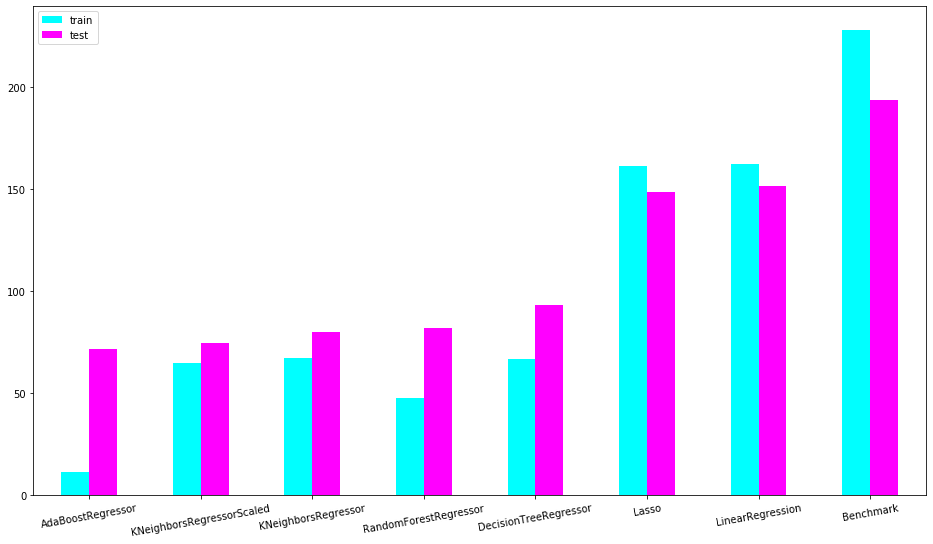

In [125]:
cofo.plot.bar(rot=10,colormap='cool',figsize = (16,9));

# 7. Algorithms introspection 

### What are the weights of the lasso coefficients? 

In [126]:
lasso.coef_ , lasso.intercept_

(array([-9.93706604e-02, -3.61419942e-01,  1.57996671e-02, -6.46475511e-01,
         1.05453351e-01,  2.47521389e+02,  2.42845651e+02,  1.34197299e-01,
         6.22908820e-01,  6.53962385e+01,  0.00000000e+00,  8.50933248e+00,
        -1.85357993e+01,  0.00000000e+00,  2.83235844e+01,  2.77261979e+01,
        -9.63807559e+01,  0.00000000e+00, -2.32996766e+02, -2.69919197e+02,
         4.54237398e+01,  5.37202370e+02,  0.00000000e+00,  1.16418855e+02,
        -0.00000000e+00, -3.02754792e+02, -2.13006611e+02, -1.01875832e+02,
        -2.43149952e+02,  4.45685124e+01,  4.09542535e+01]),
 80.16469091864167)

### Lasso coef in table 

In [127]:
pd.DataFrame({'lasso_coef':lasso.coef_},index=X_train.columns).sort_values(by=['lasso_coef']).head(32)

,lasso_coef
category_soup,-302.754792
category_pasta,-269.919197
cuisine_indian,-243.149952
category_other snacks,-232.996766
category_starters,-213.006611
cuisine_continental,-101.875832
category_extras,-96.380756
center_type_type_c,-18.535799
checkout_price,-0.646476
center_id,-0.361420


### Random Forest feature importance|

In [129]:
pd.DataFrame({'importance':decision_tree.feature_importances_},index=X_train.columns).sort_values(by=['importance']).tail(14)

,importance
region_code,0.020916
cuisine_indian,0.023507
cuisine_italian,0.027139
city_code,0.029293
emailer_for_promotion,0.040414
category_sandwich,0.044959
center_id,0.049480
week,0.050035
meal_id,0.052931
base_price,0.061726


## 8. Hyperparameters

### Look for the hyper parameters of the algorithm that best improves the test performance, show a comparison in performance using their values.

### Check Hyper parameters - max depth, for Decision Tree

In [ ]:
train_acc = []
test_acc = []

for i in range(1,21):
    tree = DecisionTreeRegressor(random_state=0,max_depth=i)
    tree.fit(X_train, y_train)
    y_pred_train = tree.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    train_acc.append(mae_train)
    y_pred = tree.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    test_acc.append(mae)

fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 21), train_acc, s=10, c='b', marker="s", label='Training MAE')
ax1.scatter(range(1, 21) ,test_acc, s=10, c='r', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("Max Depth")
plt.legend(loc='upper left');
plt.show()

In [80]:
# The chosen depth in decision tree is 17 due to lowest mae

### Check Hyper parameters - different k , for ADABoost

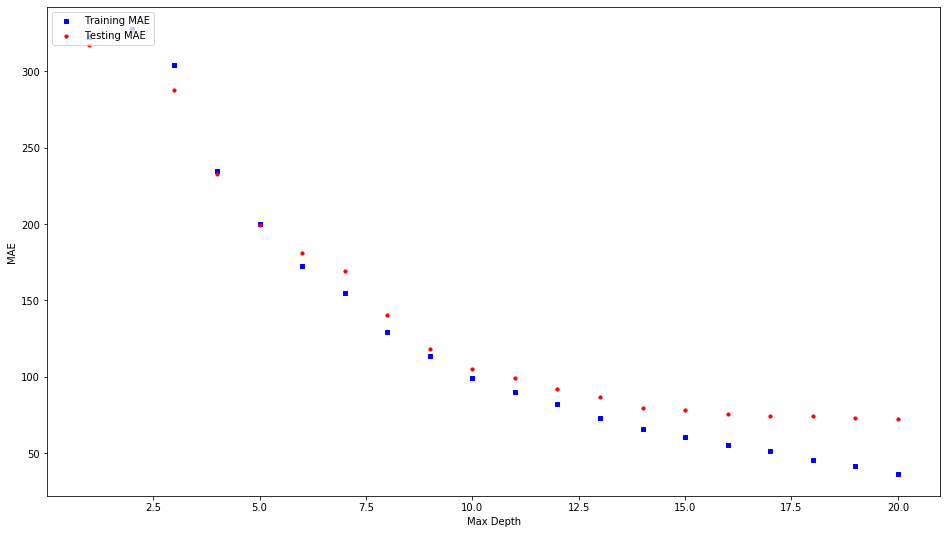

In [131]:
train_acc = []
test_acc = []

for i in range(1,21):
    
    tree = DecisionTreeRegressor(random_state=0,max_depth=i)
    ada_boost = AdaBoostRegressor(random_state=0,base_estimator=tree,n_estimators=20)
    ada_boost.fit(X_train, y_train)
    y_pred_train = ada_boost.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    train_acc.append(mae_train)
    y_pred = ada_boost.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    test_acc.append(mae)

fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 21), train_acc, s=10, c='b', marker="s", label='Training MAE')
ax1.scatter(range(1, 21) ,test_acc, s=10, c='r', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("Max Depth")
plt.legend(loc='upper left');
plt.show()

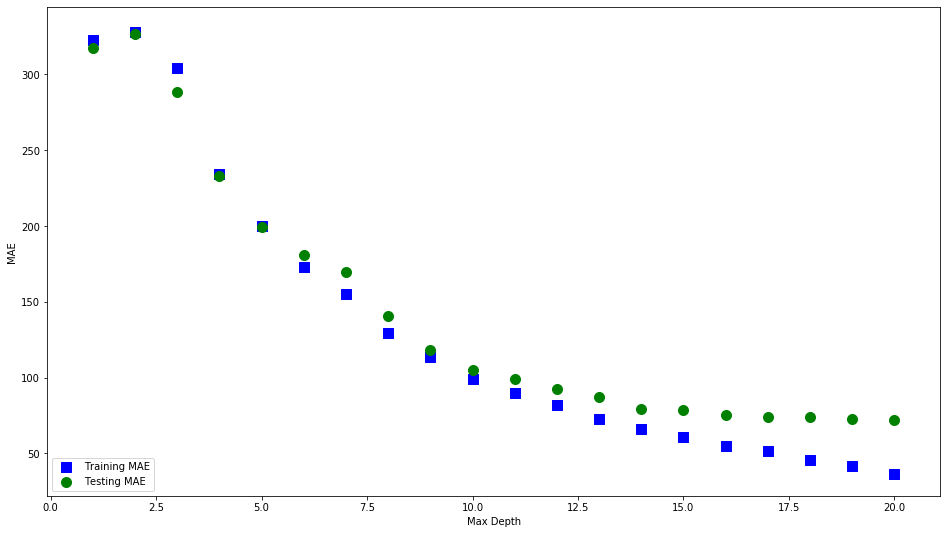

In [135]:
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 21), train_acc, s=100, c='b', marker="s", label='Training MAE')
ax1.scatter(range(1, 21) ,test_acc, s=100, c='g', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("Max Depth")
plt.legend(loc='lower left');
plt.show()

### Check Hyper parameters - different k , for Scaling KNN

In [35]:
from sklearn.neighbors import KNeighborsRegressor

train_acc = []
test_acc = []

for i in range(1,5):
    nearest_neighbors = KNeighborsRegressor(n_neighbors=3)
    nearest_neighbors.fit(X_train_scaled, y_train)
    y_pred_train = nearest_neighbors.predict(X_train_scaled)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    train_acc.append(mae_train)
    y_pred = nearest_neighbors.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    test_acc.append(mae)

fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 5), train_acc, s=10, c='b', marker="s", label='Training MAE')
ax1.scatter(range(1, 5) ,test_acc, s=10, c='r', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("Max Depth")
plt.legend(loc='upper right');
plt.show()

NameError: name 'X_train_scaled' is not defined

### Check Hyper parameters - max depth & n_estimatores , for Random Forest

In [ ]:
train_acc = []
test_acc = []

for i in range(1,20):
    tree = RandomForestRegressor(random_state=0,n_estimators=100,max_depth=i)
    tree.fit(X_train, y_train)
    y_pred_train = tree.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    train_acc.append(mae_train)
    y_pred = tree.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    test_acc.append(mae)

fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 20), train_acc, s=10, c='b', marker="s", label='Training MAE')
ax1.scatter(range(1, 20) ,test_acc, s=10, c='r', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("Max Depth")
plt.legend(loc='upper right');
plt.show()

In [ ]:
# checks the best mex depth

In [ ]:
q = test_acc[0]
for i in range(0,19):
   if (test_acc[i] < q):
        q = test_acc[i]
        w = i
print(q)
print(w)

In [79]:
# 18 is the best max depth for random forest with 39.35 mae

# 9. Additional analysis 

In [193]:
# Performance vs. amount of data Using the best performing algorithm. Show a graph describing the test performance of the algorithm when using [10%/30%/50%/70%/100%] of the train set for training the algorithm. Would you recommend collecting more data for the problem?

In [ ]:
# Hist for Knn scaled different training set size 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

length = len(X_train_scaled)
lst = [int(0.1*length),int(0.3*length),int(0.5*length),int(0.7*v),length]
avg_error_score = []
for item in lst:
    q, w = X_train_scaled[:item], y_train[:item]
    knn = KNeighborsRegressor(n_neighbors = 3) #'best performed'
    knn.fit(q, w)
    y_pred = knn.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    avg_error_score.append(mae)

In [ ]:
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

ax1.scatter(range(0.1,1,0.2) ,avg_error_score, s=10, c='r', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("Training Size")
plt.legend(loc='upper right');
plt.show()

In [ ]:
# ada boost mae on different training set size 

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

length = len(X_train)
lst = [int(0.1*length),int(0.3*length),int(0.5*length),int(0.7*length),length]
avg_error_score = []

n_estimators = 100
max_depth = 17 # the best performed

for item in lst: 
    q, w = X_train[:item], y_train[:item]
    base_estimator = DecisionTreeRegressor(max_depth=max_depth)
    ada_boost = AdaBoostRegressor(random_state=0, n_estimators=n_estimators, base_estimator=base_estimator)
    ada_boost.fit(q, w)
    y_pred = ada_boost.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    avg_error_score.append(mae)

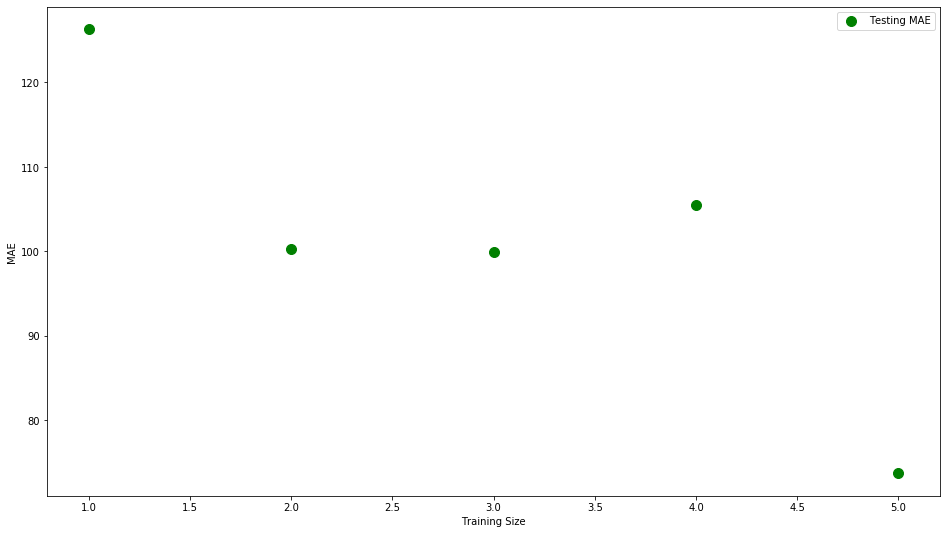

In [30]:
# Hist for ada boost

fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

ax1.scatter(range(1,6) ,avg_error_score, s=100, c='g', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("Training Size")
plt.legend(loc='upper right');
plt.show()